 # GRIP TASK 4: To Explore Decision Tree Algorithm

### OBJECTIVE: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import tree

In [2]:
# Importing the dataset
dataset = pd.read_csv('IrisData.csv')

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# deleting the iD columns
del dataset['Id']

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# Renaimg the target column values
dataset['Species']=dataset['Species'].replace({
    'Iris-versicolor':'versicolor',
    'Iris-setosa':'setosa',
    'Iris-virginica':'virginica'
    
})

In [9]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# DATA VISUALIZATION

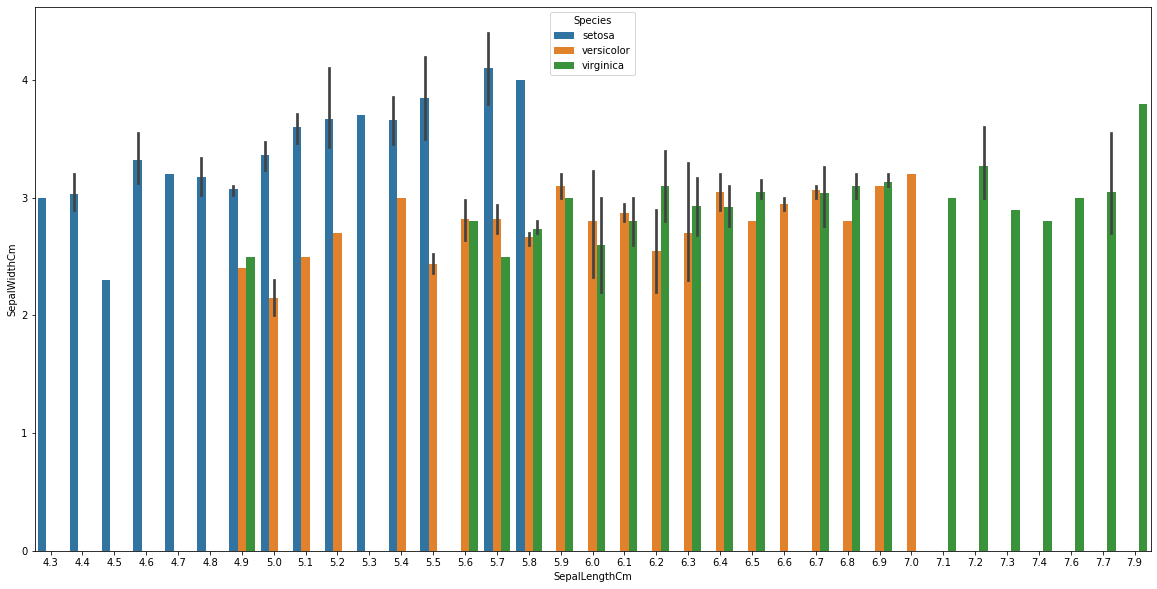

In [10]:
plt.figure(figsize=(20,10))
sb.barplot(dataset.SepalLengthCm,dataset.SepalWidthCm,hue=dataset.Species)

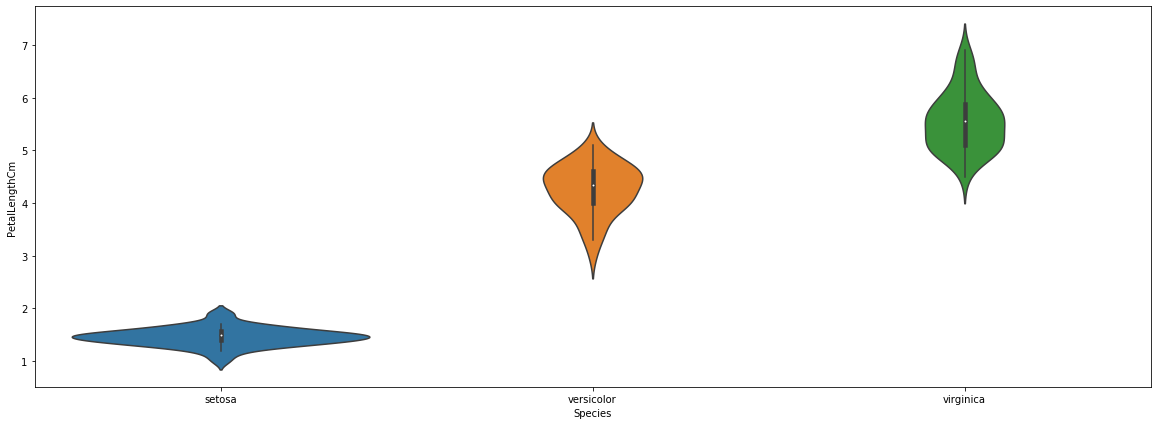

In [11]:
plt.figure(figsize=(20,7))
sb.violinplot(dataset.Species,dataset.PetalLengthCm)

We can notice that Setosa are the shortest while the virginica are longest ammong these species.

# DATA SPLITTING

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


 # MODEL BUIDING

In [14]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [17]:
acc=accuracy_score(y_test,y_pred)
print(" The model accuracy score :",acc*100)

 The model accuracy score : 100.0


This model has an accuracy of 100% GREAT!

In [18]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# TREE VISUALIZATION

In [19]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= -0.56
|   |--- class: setosa
|--- feature_3 >  -0.56
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_2 <= 0.92
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_2 >  0.92
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: virginica



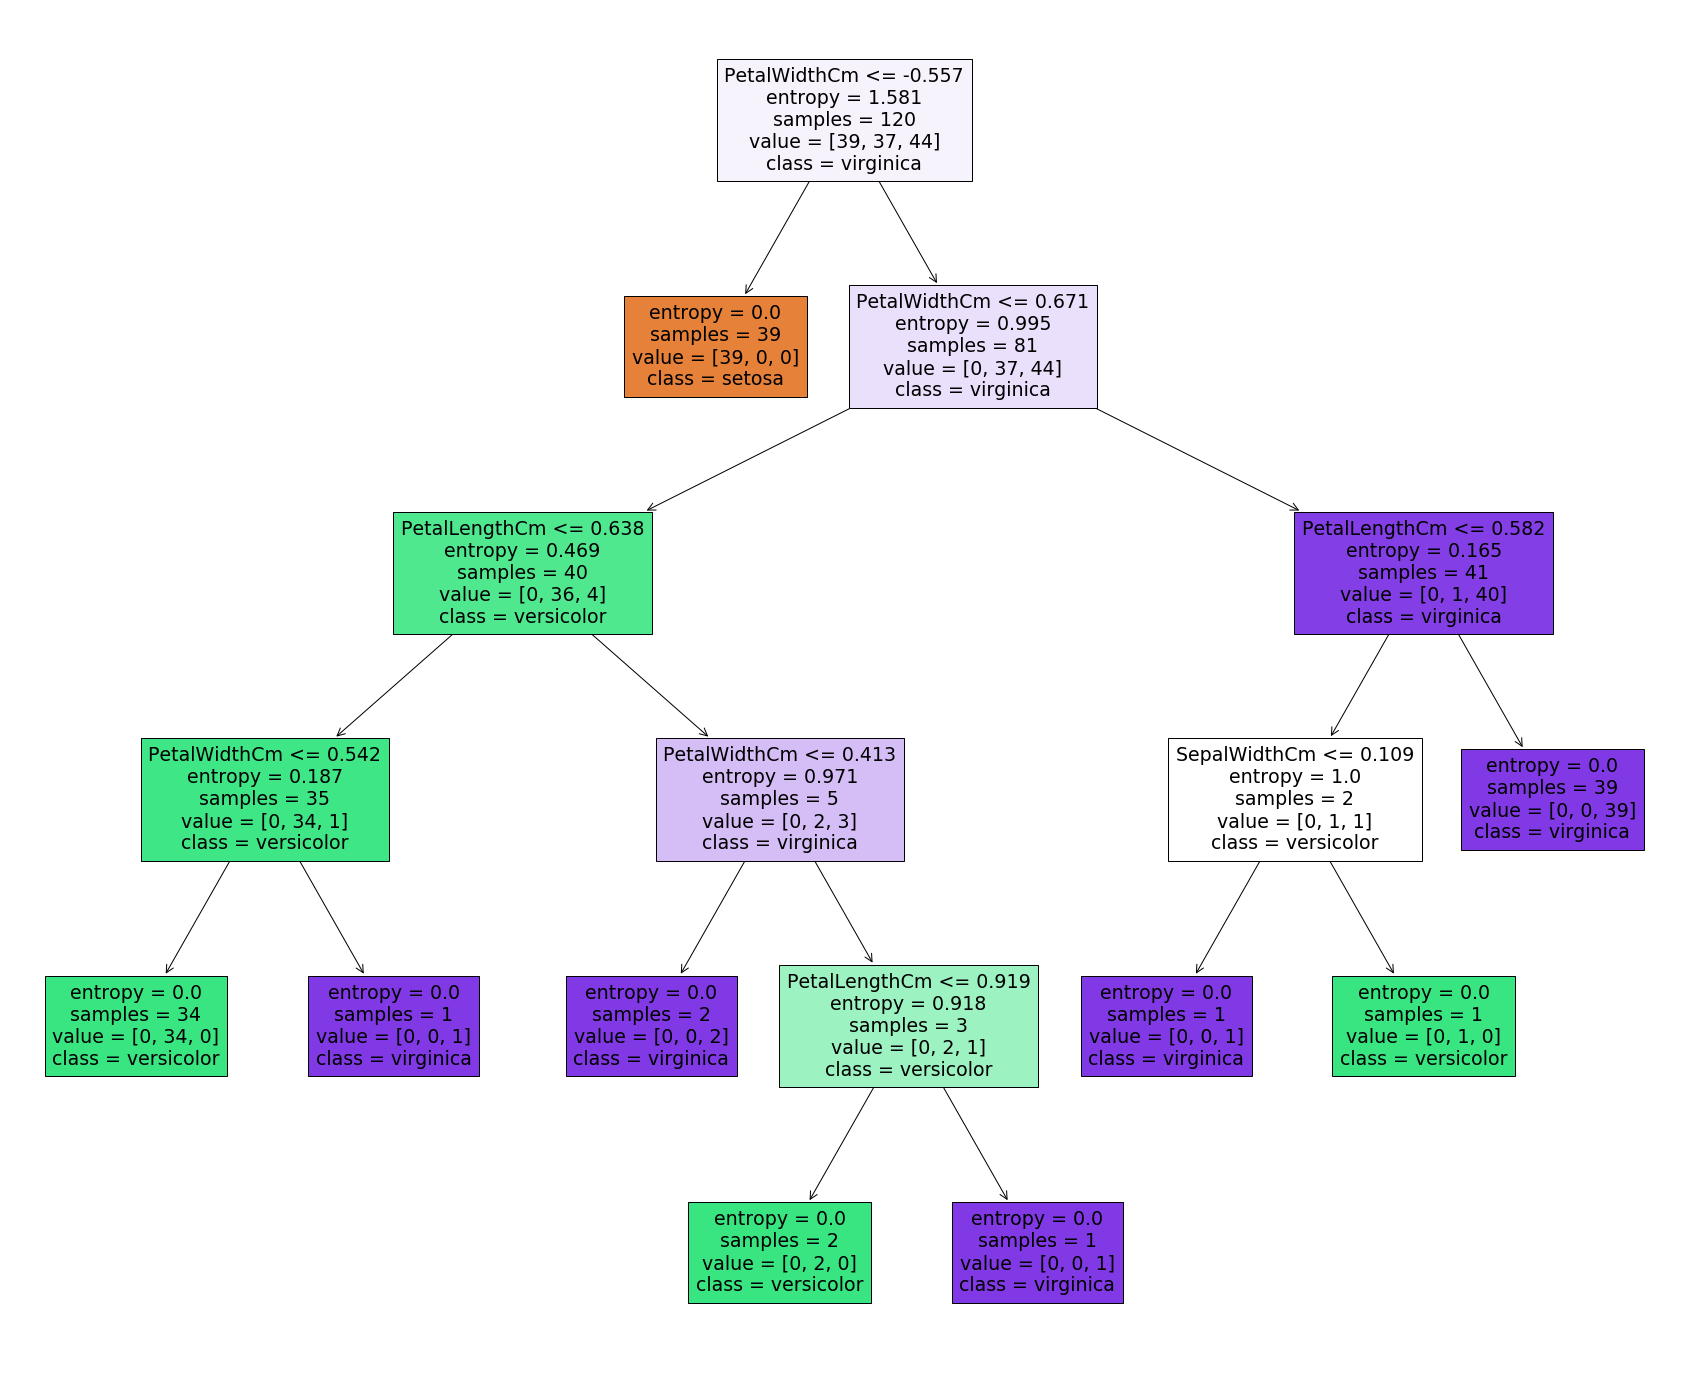

In [20]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(classifier, feature_names=dataset.columns.drop("Species"),class_names=dataset.Species.unique(), 
                   filled=True)

From the figure above, we can see that our model has specificly identify each species category according to their characteristic.

# MODEL TESTING

In [21]:
sepal_len=input("ENTER SEPAL LENGTH :")

ENTER SEPAL LENGTH :5.6


In [22]:
sepal_wid=input("ENTER SEPAL WIDTH :")

ENTER SEPAL WIDTH :4.0


In [23]:
petal_len=input("ENTER PETAL LENGTH :")

ENTER PETAL LENGTH :0.2


In [24]:
petal_wid=input("ENTER PETAL WIDTH :")

ENTER PETAL WIDTH :5.0


In [25]:
pred_specy=classifier.predict([[sepal_len,sepal_wid,petal_len,petal_wid]])

In [26]:
print("the predicted specy is : ",pred_specy)

the predicted specy is :  ['versicolor']


# CONCLUSION

This model has perfectly categorize each species based on thier characteristics with an accuracy of 100% and It can identify new data based on their values.